# Telecom Customer Churn Prediction	
### A Model that will predict whether a customer will churn or not based on some given inputs (features)

## 1. Data Loading
Here I am loading data from a csv file through Pandas library.

In [154]:
# Import some basic libraries for data science
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as ml


In [155]:
# Loading the CSV dataset into code
customer_df = pd.read_csv("/Users/haseebsagheer/Documents/Python Learning/Customer-Churn/Datasets/WA_Fn-UseC_-Telco-Customer-Churn 3.csv")
# Setting the view limit of columns to max
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Need to check the header values
print(customer_df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  

## 2. Data Understanding
Understanding the data through some useful funtions in Python, so i can get a quick overview of data such as describe(), info() etc.

In [156]:
customer_df.shape

(7043, 21)

In [157]:
customer_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [158]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [159]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [160]:
customer_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 2.1 Initial Data Visualization
Doing some intial visualization between some features and churn

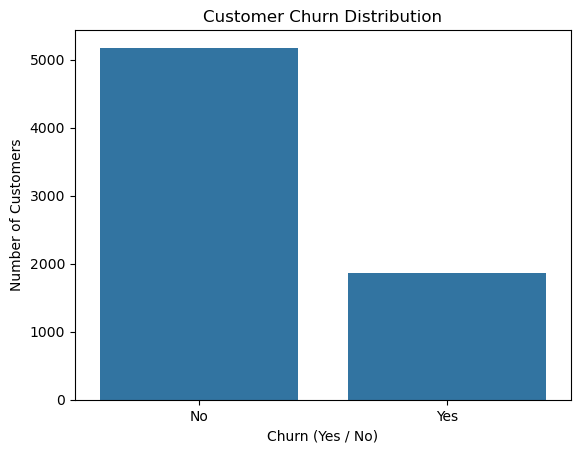

In [161]:
sb.countplot(x="Churn", data=customer_df)
ml.title("Customer Churn Distribution")
ml.xlabel("Churn (Yes / No)")
ml.ylabel("Number of Customers")
ml.show()


### 70% of the users have not churned yet, and 30% have already done so.

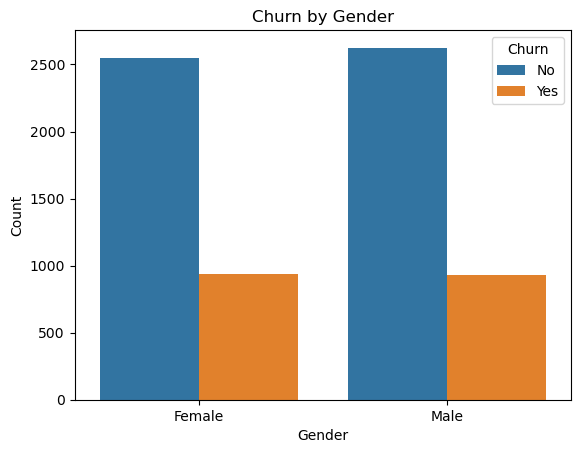

In [162]:
sb.countplot(data=customer_df, x="gender", hue="Churn")
ml.title("Churn by Gender")
ml.xlabel("Gender")
ml.ylabel("Count")
ml.show()


### Outcome 
1. Customer Churn is not significantly impacted by gender. The number of female customers who churned is very similar to the number of male customers who churned.
2. The majority of customers, for both genders, have not churned. The blue bars for both females and males are significantly taller than their corresponding orange bars.
3. The total number of male and female customers is nearly equal. The combined height of the "No" and "Yes" bars for females is very close to the combined height for males.

Text(0.5, 1.0, 'Churn by Contract Type')

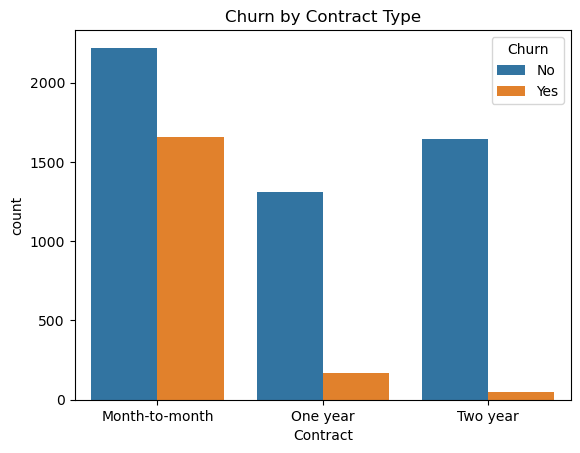

In [163]:
sb.countplot(data=customer_df,x="Contract",hue="Churn")
ml.title("Churn by Contract Type")


### Contract type is a strong predictor of churn

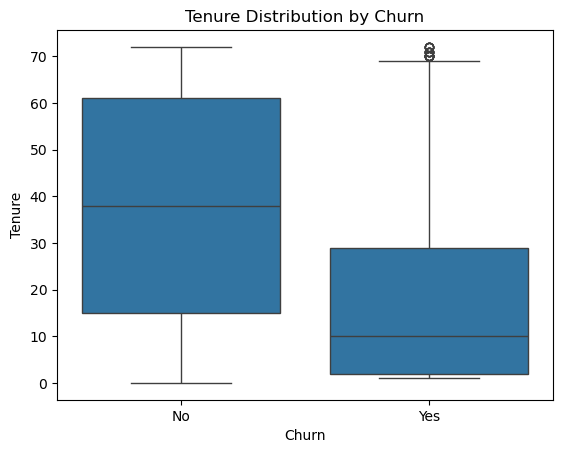

In [164]:
sb.boxplot(data=customer_df, x="Churn", y="tenure")
ml.title("Tenure Distribution by Churn")
ml.xlabel("Churn")
ml.ylabel("Tenure")
ml.show()


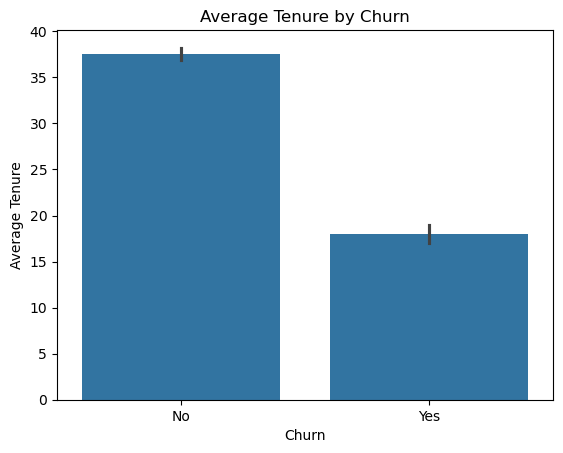

In [165]:
sb.barplot(data=customer_df, x="Churn", y="tenure", estimator="mean")
ml.title("Average Tenure by Churn")
ml.xlabel("Churn")
ml.ylabel("Average Tenure")
ml.show()


In [166]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Data Preprocessing (Missing Values, Removing Extra Feature etc)

In [167]:
customer_df.drop("customerID",axis= 1,inplace=True)
customer_df.drop("gender",axis = 1, inplace=True)

In [168]:
customer_df["Partner"].value_counts()
def binary_encoding(column):
    if column.nunique() != 2:
        print("Unable to convert to binary")
        return column
    mapping = {"Yes":1,"No":0}
    return column.replace(mapping).astype(int)

In [169]:
customer_df["Partner"] = binary_encoding(customer_df["Partner"])
customer_df["Dependents"] = binary_encoding(customer_df["Dependents"])
customer_df["PhoneService"] = binary_encoding(customer_df["PhoneService"])
customer_df["PaperlessBilling"] = binary_encoding(customer_df["PaperlessBilling"])
customer_df["Churn"] = binary_encoding(customer_df["Churn"])


/var/folders/8n/ybp5gv0n715b8994769t9_f00000gn/T/ipykernel_15552/3136517368.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return column.replace(mapping).astype(int)
/var/folders/8n/ybp5gv0n715b8994769t9_f00000gn/T/ipykernel_15552/3136517368.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return column.replace(mapping).astype(int)
/var/folders/8n/ybp5gv0n715b8994769t9_f00000gn/T/ipykernel_15552/3136517368.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

In [170]:
customer_df= pd.get_dummies(data=customer_df,columns=["MultipleLines"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["InternetService"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["OnlineSecurity"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["OnlineBackup"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["DeviceProtection"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["TechSupport"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["StreamingTV"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["StreamingMovies"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["Contract"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["PaperlessBilling"],drop_first=True)
customer_df = pd.get_dummies(data=customer_df,columns=["PaymentMethod"],drop_first=True)
customer_df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,0,0,34,1,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,0,0,45,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,0,0,2,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [ ]:

pd.set_option("display.width",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_row",None)
customer_df = customer_df[pd.to_numeric(customer_df["TotalCharges"], errors="coerce").notnull()]
customer_df["TotalCharges"] = pd.to_numeric(customer_df["TotalCharges"], errors="coerce")

customer_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   MonthlyCharges                         7032 non-null   float64
 6   TotalCharges                           7032 non-null   float64
 7   Churn                                  7032 non-null   int64  
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS